# Naive Bayes - Categorical Data

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('http://people.bu.edu/kalathur/datasets/weather.csv')

In [3]:
dataset

,outlook,temperature,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


In [4]:
dataset['play'].value_counts()

yes    9
no     5
Name: play, dtype: int64

In [5]:
dataset['outlook'].unique()

array(['sunny', 'overcast', 'rainy'], dtype=object)

In [6]:
from sklearn import preprocessing

 - Encode the labels to numeric values

In [7]:
df = dataset.copy()

In [8]:
le = {}

for col in df.columns:
    le[col] = preprocessing.LabelEncoder()
    le[col].fit(df[col].unique())
    print('{0:12s} => {1}'.format(col, le[col].classes_))
    df[col] = le[col].transform(df[col])
    
df

outlook      => ['overcast' 'rainy' 'sunny']
temperature  => ['cool' 'hot' 'mild']
humidity     => ['high' 'normal']
windy        => [False  True]
play         => ['no' 'yes']


,outlook,temperature,humidity,windy,play
0,2,1,0,0,0
1,2,1,0,1,0
2,0,1,0,0,1
3,1,2,0,0,1
4,1,0,1,0,1
5,1,0,1,1,0
6,0,0,1,1,1
7,2,2,0,0,0
8,2,0,1,0,1
9,1,2,1,0,1


In [9]:
le

{'outlook': LabelEncoder(),
 'temperature': LabelEncoder(),
 'humidity': LabelEncoder(),
 'windy': LabelEncoder(),
 'play': LabelEncoder()}

In [10]:
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB

In [11]:
gnb = GaussianNB()

In [12]:
used_features =[
    "outlook",
    "temperature",
    "humidity",
    "windy"
]


# Train classifier
gnb.fit(
    df[used_features].values,
    df["play"]
)

GaussianNB(priors=None, var_smoothing=1e-09)

In [13]:
y_pred = gnb.predict(df[used_features])

# Print results
print("Number of mislabeled points out of a total {} points : {}, performance {:05.2f}%"
      .format(
          df.shape[0],
          (df["play"] != y_pred).sum(),
          100*(1-(df["play"] != y_pred).sum()/df.shape[0])
))

Number of mislabeled points out of a total 14 points : 1, performance 92.86%


In [17]:
pd.DataFrame({'predicted': le['play'].inverse_transform(y_pred), 'actual': dataset['play']})

,predicted,actual
0,no,no
1,no,no
2,yes,yes
3,yes,yes
4,yes,yes
5,yes,no
6,yes,yes
7,no,no
8,yes,yes
9,yes,yes


In [20]:
cm = metrics.confusion_matrix(y_pred, df['play'], labels=[0, 1])
cm


array([[4, 0],
       [1, 9]])

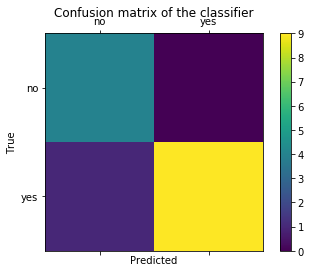

In [22]:
labels=['no', 'yes']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


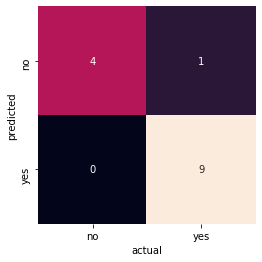

In [29]:
class WorkingHeatmap():
    def __init__(self, xlabel, ylabel):
        self.xlabel = xlabel
        self.ylabel = ylabel

    def plot(self,
        data, vmin=None, vmax=None, cmap=None, center=None, robust=False,
        annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white',
        cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto',
        yticklabels='auto', mask=None, ax=None, **kwargs):

        sns.heatmap(
            data, vmin, vmax, cmap, center, robust,
            annot, fmt, annot_kws, linewidths, linecolor,
            cbar, cbar_kws, cbar_ax, square, xticklabels,
            yticklabels, mask, ax, **kwargs)
        plt.xlabel(self.xlabel)
        plt.ylabel(self.ylabel);

        bottom_y, top_y = plt.ylim() 
        bottom_y += 0.5 
        top_y -= 0.5 
        plt.ylim(bottom_y, top_y)
        plt.show() 

heatmap = WorkingHeatmap(xlabel='actual', ylabel='predicted')
heatmap.plot(cm.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=labels,
            yticklabels=labels)